<a href="https://colab.research.google.com/github/anmol0720/Airport/blob/master/Airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx

In [0]:
from pandas import read_csv

In [0]:
columns= ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport','Destination airport ID', 'Codeshare', 'Stops', 'Equipment']
routes=read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',header=None)
routes.columns=columns

In [0]:
columns= ['ID', 'Name', 'City', 'Country', 'IATA', 'VIDP', 'Lat', 'Long', 'Elevation', 'Timezone', 'DST','Timezone Olson Format', 'type', 'Source']
airports=read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',header=None)
airports.columns=columns

In [0]:
edge=[(row['Source airport'],row['Destination airport']) for item,row in routes[['Source airport','Destination airport']].iterrows()]

In [0]:
route_graph=nx.Graph()
route_graph.add_edges_from(edge)

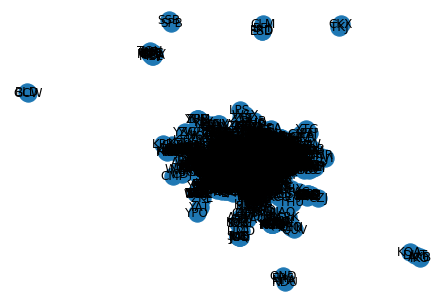

In [9]:
import matplotlib.pyplot as plt
nx.draw(route_graph, with_labels = True) 

In [0]:
import math
def cal_flight_distance(orgin,destination):
  radius=6371
  lat1,lon1=origin
  lat2,lon2=destination
  
  dlat=math.radian(lat2-lat1)
  dlon=math.radian(lon2-lon1)
  a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1))*math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  d= radius*c
  return(d)

In [0]:
def all_shortest_simple_paths(graph,source,destination):
  return list(p for p in nx.all_shortest_simple_paths(graph, source=source, target=destination,))

In [0]:
def get_all_shortest_path_airportname(route_graph,airports,origin,destination):
  airports=airports.set_index('IATA')
  entries=[]
  for path in find_all_shortest_path(graph,source,destination):
    entries.append([dict(airports.loc[item])['City'] for item in path])
  print(entries)